# i. Import Libraries
> *Cell* pertama pada *notebook* harus berisi dan hanya berisi semua library yang digunakan dalam project.



In [3]:
from pathlib import Path
import tensorflow as tf
from PIL import Image
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ii. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

## Mengecek data

In [4]:
data_dir = "./cat_dog/"
train_dir = data_dir + "./training_set"
test_dir = data_dir + "./test_set/"

train_path = Path(train_dir)
test_path = Path(test_dir)

train_img_path = list(train_path.glob(r'*/*.jpg'))
train_img_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_img_path))

test_img_path = list(test_path.glob(r'*/*.jpg'))
test_img_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],test_img_path))

print(f"Pada data train, jumlah gambar cat adalah {train_img_labels.count('cats')} dan dog adalah {train_img_labels.count('dogs')}")
print(f"Pada data test, jumlah gambar cat adalah {test_img_labels.count('cats')} dan dog adalah {test_img_labels.count('dogs')}")

Pada data train, jumlah gambar cat adalah 4000 dan dog adalah 4005
Pada data test, jumlah gambar cat adalah 1011 dan dog adalah 1012


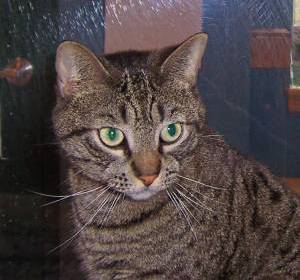

In [5]:
Cat = list(train_path.glob('cats/*'))
Image.open(str(Cat[0]))

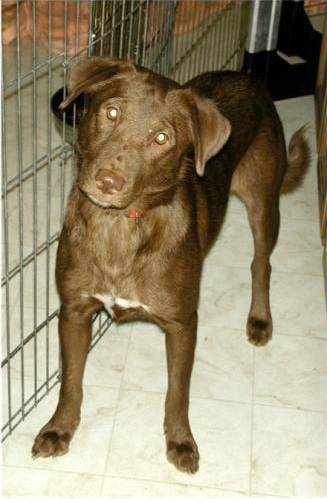

In [6]:
Dog = list(train_path.glob('Dogs/*'))
Image.open(str(Dog[0]))

## Membuat dataframe

In [7]:
# Data Train
train_img_path_series = pd.Series(train_img_path,name="Image").astype(str)
train_img_labels_series = pd.Series(train_img_labels,name="Category")

df_train = pd.concat([train_img_path_series,train_img_labels_series],axis=1)

# Data Test
test_img_path_series = pd.Series(test_img_path,name="Image").astype(str)
test_img_labels_series = pd.Series(test_img_labels,name="Category")

df_test = pd.concat([test_img_path_series,test_img_labels_series],axis=1)

print (df_train.shape)
print (df_test.shape)

(8005, 2)
(2023, 2)


## Cek duplicate

Pada Data Test

In [8]:
duplicate_test = df_test[df_test['Image'].str.contains('\(')]
duplicate_test.shape

(23, 2)

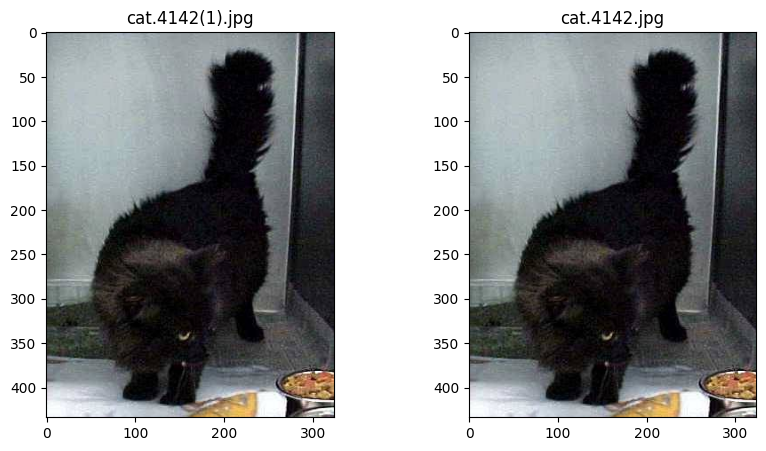

In [9]:
# Mengecek apakah gambarnay sama atau tidak

Dup_1 = list(test_path.glob('cats/cat.4142(1).jpg'))
Dup_1_img = Image.open(str(Dup_1[0]))

Dup_2 = list(test_path.glob('cats/cat.4142.jpg'))
Dup_2_img = Image.open(str(Dup_2[0]))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(Dup_1_img)
axs[0].set_title('cat.4142(1).jpg')

axs[1].imshow(Dup_2_img)
axs[1].set_title('cat.4142.jpg')

plt.show()

Jika dilihat dari gambar yang pertana, ternyata gambarnya sama, dapat disimpulkan bahwa semua yang memiliki nama (1) itu merupakan duplicate, sehingga harus dihilangkan

In [10]:
df_test = df_test[~df_test['Image'].isin(duplicate_test['Image'])]
df_test.shape

(2000, 2)

Pada Data Train

In [11]:
duplicate_train = df_train[df_train['Image'].str.contains('\(')]
duplicate_train

Image Category
4715  cat_dog\training_set\dogs\dog.1642(1).jpg     dogs
6286  cat_dog\training_set\dogs\dog.3055(1).jpg     dogs
7630   cat_dog\training_set\dogs\dog.664(1).jpg     dogs
7826    cat_dog\training_set\dogs\dog.84(1).jpg     dogs
7894    cat_dog\training_set\dogs\dog.90(1).jpg     dogs

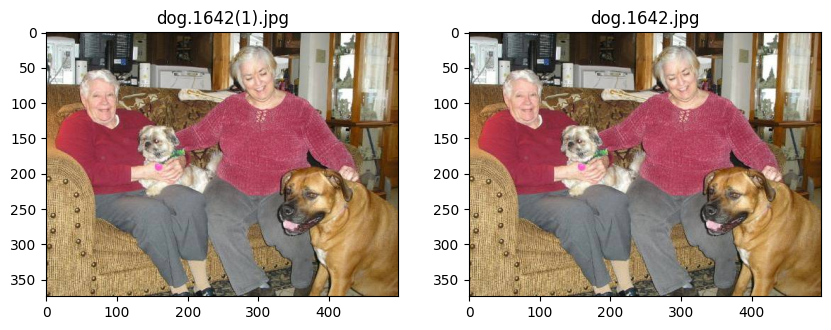

In [12]:
# Mengecek apakah gambarnay sama atau tidak

Dup_1 = list(train_path.glob('dogs/dog.1642(1).jpg'))
Dup_1_img = Image.open(str(Dup_1[0]))

Dup_2 = list(train_path.glob('dogs/dog.1642.jpg'))
Dup_2_img = Image.open(str(Dup_2[0]))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(Dup_1_img)
axs[0].set_title('dog.1642(1).jpg')

axs[1].imshow(Dup_2_img)
axs[1].set_title('dog.1642.jpg')

plt.show()

Jika dilihat dari gambar yang pertana, ternyata gambarnya sama, dapat disimpulkan bahwa semua yang memiliki nama (1) itu merupakan duplicate, sehingga harus dihilangkan

In [13]:
df_train = df_train[~df_train['Image'].isin(duplicate_train['Image'])]
df_train.shape

(8000, 2)

# iii. Exploratory Data Analysis (EDA)
> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Mengecek distribusi data

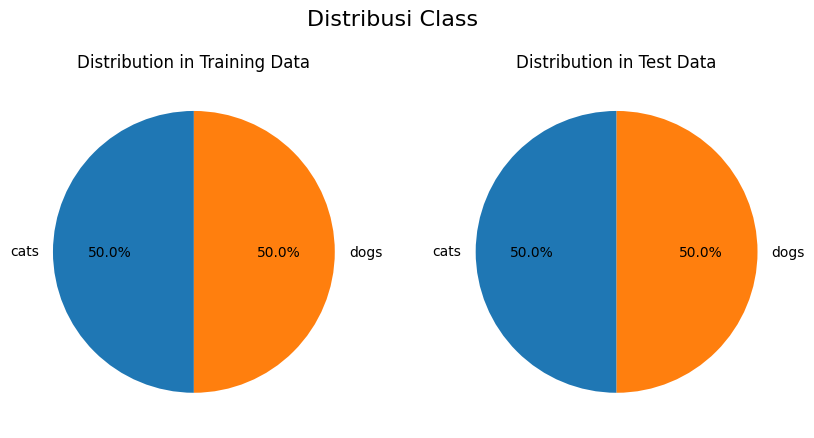

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

distribusi_train = df_train['Category'].value_counts()
count_df_train = pd.DataFrame({'Category': distribusi_train.index, 'Count': distribusi_train.values})

distribusi_test = df_test['Category'].value_counts()
count_df_test = pd.DataFrame({'Category': distribusi_test.index, 'Count': distribusi_test.values})

# Data train
axs[0].pie(count_df_train['Count'], labels=count_df_train['Category'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution in Training Data')

# Data test
axs[1].pie(count_df_test['Count'], labels=count_df_test['Category'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution in Test Data')

plt.suptitle('Distribusi Class', fontsize=16)
plt.show()

Berdasarkan pie chart diatas, terlihat bahwa kedua class tersebut sama besarnya, sehingga tidak perlu adanya balancing data

## Mengecek gambar dan shape

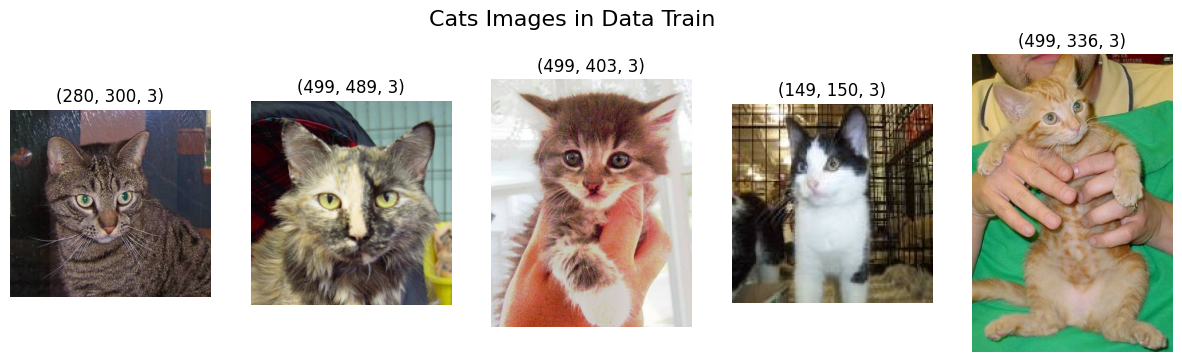

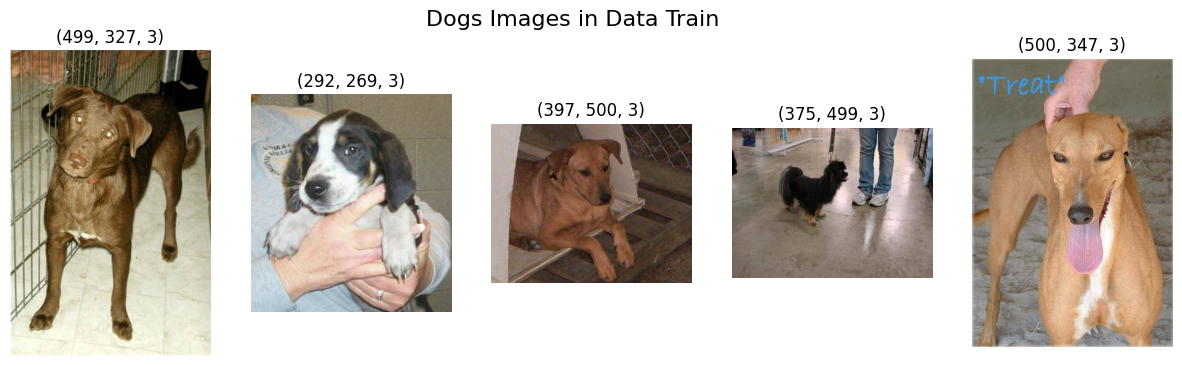

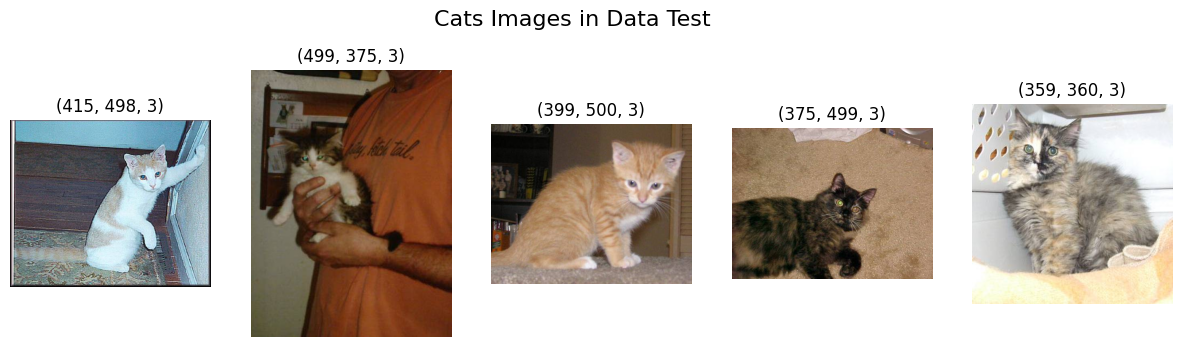

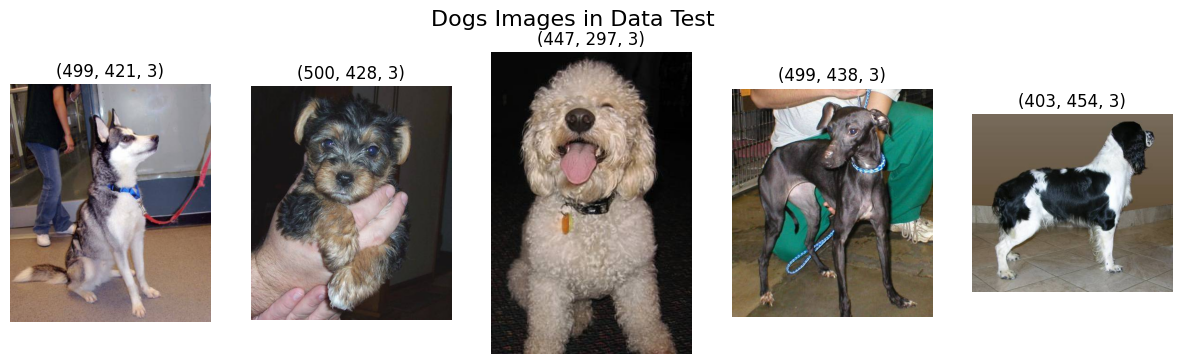

In [15]:
cat_train_images = df_train[df_train['Category'] == 'cats']['Image'].head(5).tolist()
dog_train_images = df_train[df_train['Category'] == 'dogs']['Image'].head(5).tolist()

cat_test_images = df_test[df_test['Category'] == 'cats']['Image'].head(5).tolist()
dog_test_images = df_test[df_test['Category'] == 'dogs']['Image'].head(5).tolist()

def display_images(image_paths, title):
    fig, axis = plt.subplots(1, len(image_paths), figsize=(15, 4))
    fig.suptitle(title, fontsize=16)
    for i, img_path in enumerate(image_paths):
        img = plt.imread(img_path, format='PNG')
        axis[i].imshow(img)
        axis[i].set_title(f'{img.shape}')
        axis[i].axis('off')
    return fig

display_images(cat_train_images, 'Cats Images in Data Train')
display_images(dog_train_images, 'Dogs Images in Data Train')

display_images(cat_test_images, 'Cats Images in Data Test')
display_images(dog_test_images, 'Dogs Images in Data Test')

plt.show()


Berdasarkan gambar diatas, dari kedua hewan tersebut sepertinya sedikit sulit untuk membedakan karena sama-sama hewan 4 kaki dan berbulu, dan juga karena ukuran imagenya juga berbeda, akan dibuatkan visualisasi berdasarkan distribusi ukurannya

## Visualisasi Shape

In [16]:
def shaper(row):
    shape = image.load_img(row['Image']).size
    row['Height'] = shape[1]
    row['Width'] = shape[0]
    return row

df_train_hw = df_train.apply(shaper,axis=1)
df_test_hw = df_test.apply(shaper,axis=1)

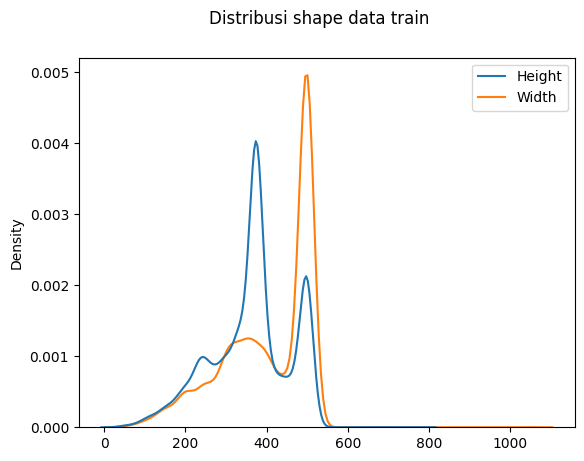

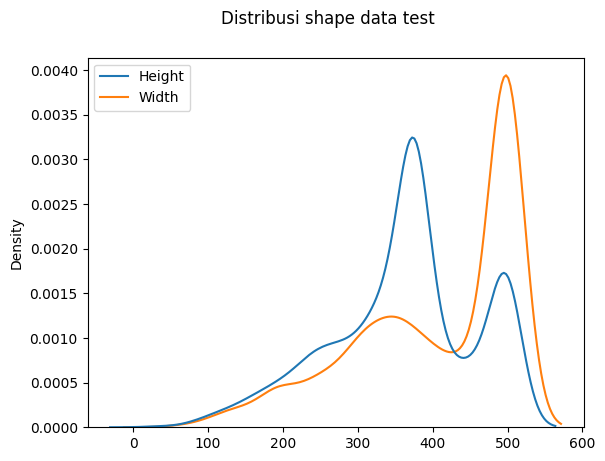

In [17]:
plt.figure()
sns.kdeplot(data=df_train_hw)
plt.suptitle('Distribusi shape data train')
plt.show()

plt.figure()
sns.kdeplot(data=df_test_hw)
plt.suptitle('Distribusi shape data test')
plt.show()


Memperlihatkan variasi ukuran image pada data train dan data test, sebelum digunakan untuk pemodelan lebih baik untuk merubahnya menjadi ukuran yang sama

# iv. Preprocessing

In [18]:
batch_size = 32
img_height = 150
img_width = 150

In [19]:
train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="both",
  color_mode='rgb',
  seed=1509,
  image_size=(img_height, img_width),
  batch_size = batch_size,
  shuffle=True)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  color_mode='rgb',
  seed=1509,
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


In [20]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


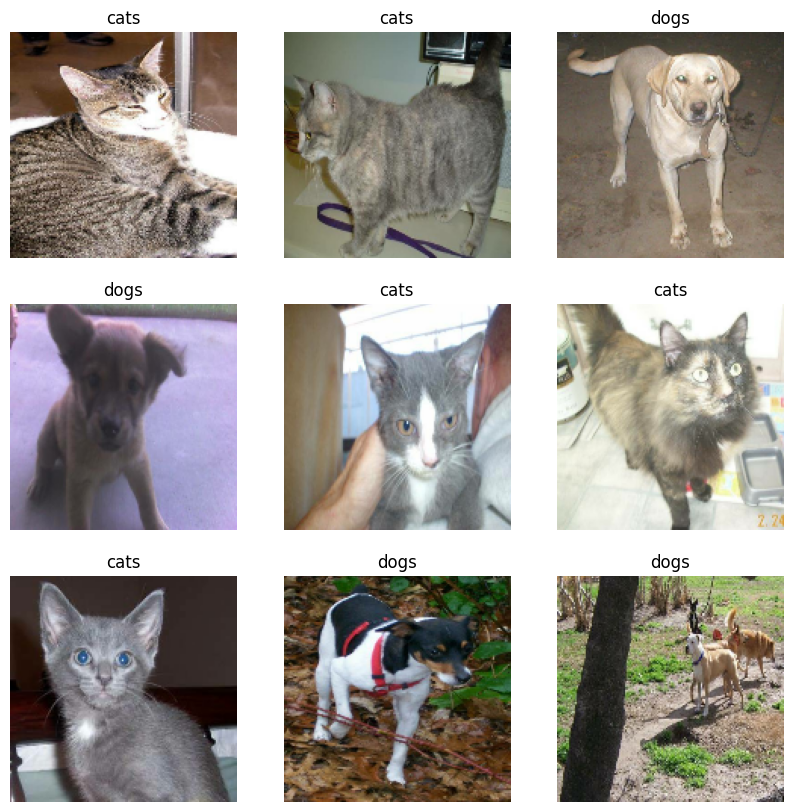

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax= plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

# v. Modeling

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
tf.keras.backend.clear_session()
call_back = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)

## Non Augmented

In [24]:
inputs= (img_height, img_width,3)

pretrained_model = tf.keras.applications.Xception(include_top=False,
                                                  input_shape=inputs,pooling='avg')
pretrained_model.trainable = False

model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=inputs),
    pretrained_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=2, activation='sigmoid')
])

In [25]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [26]:
Model_fit = model.fit(
  train_ds,
  validation_data=val_ds,
  callbacks=call_back,
  epochs=32
)

Epoch 1/32


c:\ProgramData\miniconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


201/201 [==============================] - 16s 65ms/step - loss: 0.1097 - accuracy: 0.9563 - val_loss: 0.1136 - val_accuracy: 0.9550
Epoch 2/32
201/201 [==============================] - 11s 55ms/step - loss: 0.0635 - accuracy: 0.9741 - val_loss: 0.0852 - val_accuracy: 0.9688
Epoch 3/32
201/201 [==============================] - 11s 55ms/step - loss: 0.0441 - accuracy: 0.9833 - val_loss: 0.1363 - val_accuracy: 0.9557
Epoch 4/32
201/201 [==============================] - 11s 56ms/step - loss: 0.0403 - accuracy: 0.9847 - val_loss: 0.1273 - val_accuracy: 0.9638
Epoch 5/32
201/201 [==============================] - 11s 55ms/step - loss: 0.0427 - accuracy: 0.9831 - val_loss: 0.1269 - val_accuracy: 0.9569


<Axes: >

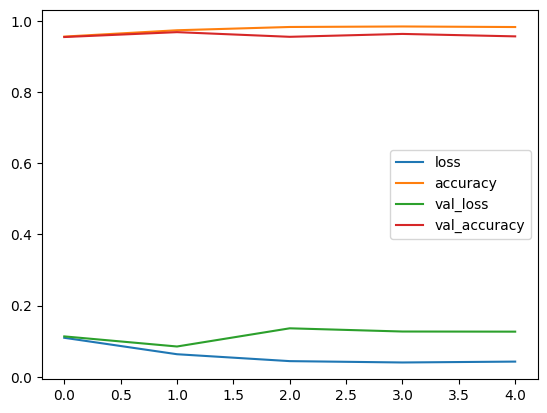

In [27]:
Summary = pd.DataFrame(Model_fit.history)
Summary.plot()

In [28]:
Model_Results = model.evaluate(train_ds)
print(Model_Results)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

201/201 [==============================] - 9s 44ms/step - loss: 0.0517 - accuracy: 0.9783
[0.05172582343220711, 0.978294849395752]
LOSS:  0.0517
ACCURACY:  0.98


In [29]:
# Data test
actual_test = []
predicted_test = [] 

for images,labels in test_ds:
        predictions_test = model.predict(images)
        for i in labels:
                actual_test.append(class_names[labels[i]])
                predicted_test.append(class_names[np.argmax(predictions_test[i])])

# Data train
actual_train = []
predicted_train = [] 

for images,labels in train_ds:
        predictions_train = model.predict(images)
        for i in labels:
                actual_train.append(class_names[labels[i]])
                predicted_train.append(class_names[np.argmax(predictions_train[i])])

1/1 [==============================] - 0s 27ms/step


Data Test
              precision    recall  f1-score   support

        cats       0.97      1.00      0.98      3177
        dogs       1.00      0.97      0.98      3227

    accuracy                           0.98      6404
   macro avg       0.98      0.98      0.98      6404
weighted avg       0.98      0.98      0.98      6404

Data Test
              precision    recall  f1-score   support

        cats       0.93      1.00      0.96      1037
        dogs       1.00      0.92      0.96       986

    accuracy                           0.96      2023
   macro avg       0.96      0.96      0.96      2023
weighted avg       0.96      0.96      0.96      2023



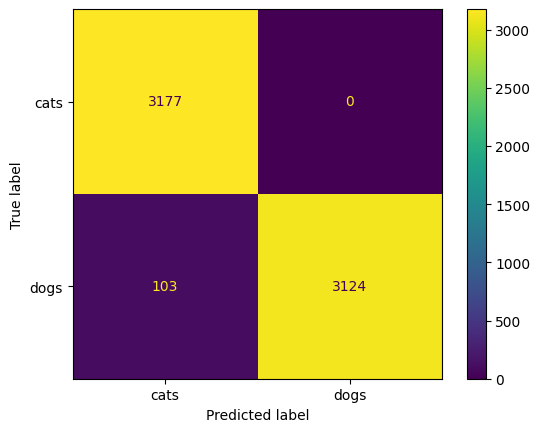

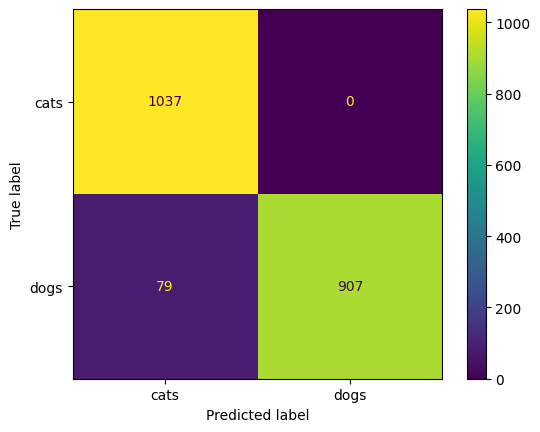

In [43]:
# Data train
print('Data Test')
print(classification_report(actual_train,predicted_train))

cm_train = confusion_matrix(actual_train,predicted_train)
ConfusionMatrixDisplay(cm_train, display_labels=class_names).plot()

# Data est
print('Data Test')
print(classification_report(actual_test,predicted_test))

cm_test = confusion_matrix(actual_test,predicted_test)
ConfusionMatrixDisplay(cm_test, display_labels=class_names).plot()

## Augmented

In [31]:
aug = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

model_aug = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=inputs),
    aug,
    pretrained_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=2, activation='sigmoid')
])

In [32]:
model_aug.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [33]:
Model_fit_aug = model_aug.fit(
  train_ds,
  validation_data=val_ds,
  callbacks=call_back,
  epochs=32
)

Epoch 1/32


c:\ProgramData\miniconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


201/201 [==============================] - 85s 399ms/step - loss: 0.1798 - accuracy: 0.9211 - val_loss: 0.1023 - val_accuracy: 0.9550
Epoch 2/32
201/201 [==============================] - 78s 389ms/step - loss: 0.1423 - accuracy: 0.9424 - val_loss: 0.1079 - val_accuracy: 0.9513
Epoch 3/32
201/201 [==============================] - 84s 419ms/step - loss: 0.1388 - accuracy: 0.9453 - val_loss: 0.0898 - val_accuracy: 0.9606
Epoch 4/32
201/201 [==============================] - 79s 392ms/step - loss: 0.1254 - accuracy: 0.9483 - val_loss: 0.0747 - val_accuracy: 0.9700
Epoch 5/32
201/201 [==============================] - 78s 386ms/step - loss: 0.1191 - accuracy: 0.9511 - val_loss: 0.0673 - val_accuracy: 0.9731
Epoch 6/32
201/201 [==============================] - 78s 390ms/step - loss: 0.1046 - accuracy: 0.9563 - val_loss: 0.0764 - val_accuracy: 0.9669
Epoch 7/32
201/201 [==============================] - 77s 383ms/step - loss: 0.0984 - accuracy: 0.9603 - val_loss: 0.0694 - val_accuracy: 0.9

<Axes: >

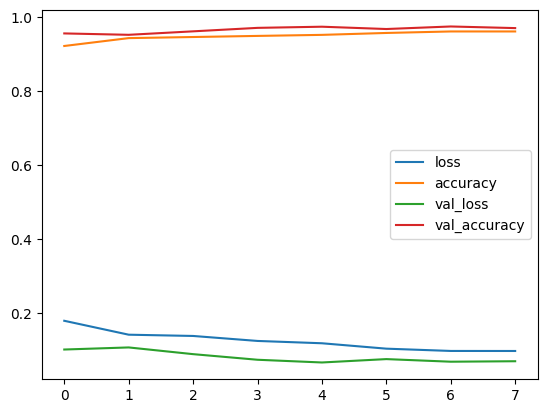

In [34]:
Summary = pd.DataFrame(Model_fit_aug.history)
Summary.plot()

In [35]:
Model_Results_aug = model_aug.evaluate(train_ds)
print(Model_Results_aug)
print("LOSS:  " + "%.4f" % Model_Results_aug[0])
print("ACCURACY:  " + "%.2f" % Model_Results_aug[1])

201/201 [==============================] - 9s 43ms/step - loss: 0.0477 - accuracy: 0.9814
[0.047666311264038086, 0.9814178943634033]
LOSS:  0.0477
ACCURACY:  0.98


In [36]:
actual_aug_test = []
predicted_aug_test = [] 

for images,labels in test_ds:
        predictions_aug_test = model_aug.predict(images)
        for i in labels:
                actual_aug_test.append(class_names[labels[i]])
                predicted_aug_test.append(class_names[np.argmax(predictions_aug_test[i])])

actual_aug_train = []
predicted_aug_train = [] 

for images,labels in test_ds:
        predictions_aug_train = model_aug.predict(images)
        for i in labels:
                actual_aug_train.append(class_names[labels[i]])
                predicted_aug_train.append(class_names[np.argmax(predictions_aug_train[i])])

1/1 [==============================] - 0s 23ms/step


Data Train
              precision    recall  f1-score   support

        cats       0.98      0.93      0.96       997
        dogs       0.94      0.99      0.96      1026

    accuracy                           0.96      2023
   macro avg       0.96      0.96      0.96      2023
weighted avg       0.96      0.96      0.96      2023

Data Test
              precision    recall  f1-score   support

        cats       0.97      0.95      0.96       972
        dogs       0.95      0.97      0.96      1051

    accuracy                           0.96      2023
   macro avg       0.96      0.96      0.96      2023
weighted avg       0.96      0.96      0.96      2023



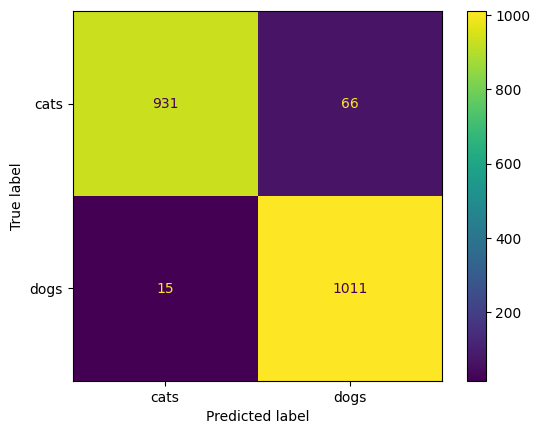

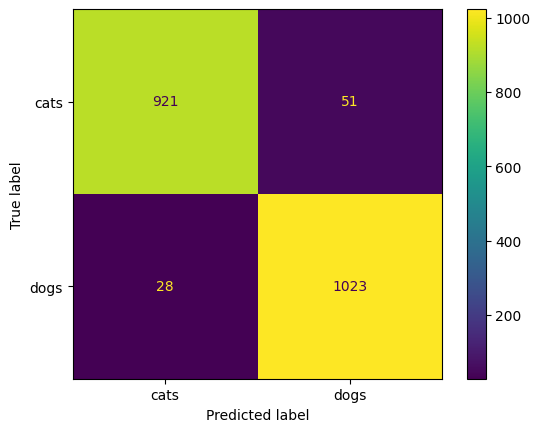

In [37]:
# Data train
print('Data Train')
print(classification_report(actual_aug_test,predicted_aug_test))

cm_aug_train = confusion_matrix(actual_aug_test,predicted_aug_test)
ConfusionMatrixDisplay(cm_aug_train, display_labels=class_names).plot()

# Data Test
print('Data Test')
print(classification_report(actual_aug_train,predicted_aug_train))

cm_aug_test = confusion_matrix(actual_aug_train,predicted_aug_train)
ConfusionMatrixDisplay(cm_aug_test, display_labels=class_names).plot()



Karena keterbatasan waktu, belum ditemukan proses augmentasi yang dapat meningkatkan akurasi model

# v. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya.

In [38]:
model.save('./best_model.keras')

# vi. Model Inference
>  Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.



In [39]:
import keras
best_model = keras.models.load_model('./best_model.keras')

In [40]:
import tensorflow as tf
import numpy as np

img_height = 150
img_width = 150
class_names = ['cats', 'dogs']

Cats test

In [41]:
img_url = 'https://upload.wikimedia.org/wikipedia/commons/1/15/Cat_August_2010-4.jpg'
img_path = tf.keras.utils.get_file ('new_image', origin=img_url)

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = best_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 667ms/step
This image most likely belongs to cats with a 72.43 percent confidence.


Dogs test

In [42]:
img_url2 = 'https://cdn.britannica.com/16/234216-050-C66F8665/beagle-hound-dog.jpg'
img_path2 = tf.keras.utils.get_file ('new_image2', origin=img_url2)

img2 = tf.keras.utils.load_img(
    img_path2, target_size=(img_height, img_width)
)

img_array2 = tf.keras.utils.img_to_array(img2)
img_array2 = tf.expand_dims(img_array2, 0)

predictions2 = best_model.predict(img_array2)
score2 = tf.nn.softmax(predictions2[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score2)], 100 * np.max(score2))
)

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to dogs with a 52.59 percent confidence.


# viii. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:

1. Dari EDA, terlihat bahwa dataset ini data yang digunakan balance sehingga untuk melakukan pemodelan tidak adanya kendala terkait jumlah data, pada gambar kedua hewan yang akan dibandingkan ini, sedikit sulit karena sama-sama hewan 4 kaki dan berbulu. Semua gambar yang ada pada dataset memiliki ukuran gambar yang berbeda-beda, untuk memudahkan saat pemodelan maka ditetapkan ukuran yang sama.
    
2. Berdasarkan Model, data yang dilakukan augmen memiliki nilai akurasi yang lebih rendah dibandingkan dengan data yang tidak dilakukan augmen. Model yang tidak dilakukan augmen tergolong goodfit karena nilai akurasi pada data train dan data test tinggi dan juga gapnya yang kecil. Model tersebut dapat memprediksi cat dan dog dengan baik.

    Model ini dapat memprediksi cats yang actual cats dengan baik, dan sebaliknya memprediksi dogs yang actual dogs dengan baik, sehingga seharusnya tidak ada kenala jika memprediksi hewan antara kucing ataupun anjing

3. Dalam segi bisnis, model ini bisa dipakai untuk membedakan antara kucing dan anjing pada lokasi-lokasi yang ramai oleh hewan peliharaan, seperti taman umum dan rumah sakit hewan ataupun klinik hewan, berguna apabila ada pemilik yang kehilangan hewan peliharaannya, sehingga dapat dibantu dengan model ini untuk mendeteksi apakah hewan tersebut kucing ataupun anjing. Bisa juga untuk menangani hewan liar, karena perlakuan antara kucing dan anjing berbeda dimana kucing akan mencakar sedangkan anjing akan menggigit, sehingga dapat mempersiapkan perlengkapan yang sesuai.

4. Untuk mengimprovenya dapat digunakan parameter augmen yang lebih baik, karena keterbatasan waktu belum ditemukan proses augmentasi yang dapat meningkatkan akurasi model 